<a href="https://colab.research.google.com/github/patiluday3101/Final_assinment_pw/blob/main/EDA_election2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# Load the dataset
file_path = '/content/election2024.csv'
election_data = pd.read_csv(file_path)




In [13]:
# Check for missing values
print("Missing Values:\n", election_data.isnull().sum())

# Fill missing values for 'job_type' and 'company_type' with 'Unknown'
election_data['job_type'].fillna('Unknown', inplace=True)
election_data['company_type'].fillna('Unknown', inplace=True)

# Verify missing values handled
print("\nMissing Values After Cleaning:\n", election_data.isnull().sum())


Missing Values:
 id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

Missing Values After Cleaning:
 id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64


<ipython-input-13-c74d15affd52>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  election_data['job_type'].fillna('Unknown', inplace=True)
<ipython-input-13-c74d15affd52>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [14]:
# Summary of categorical data
categorical_cols = election_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col} Value Counts:\n", election_data[col].value_counts())

# Summary of numerical data
numerical_cols = election_data.select_dtypes(include=['float64', 'int64']).columns
print("\nNumerical Data Summary:\n", election_data[numerical_cols].describe())



id Value Counts:
 id
07169ed8148ce047    1
0716a8f7a98ceab4    1
0716968485ccea72    1
07167fa9264ceb65    1
07166778618ce822    1
                   ..
0716afc0a28cea87    1
07168fbd9d4ce53f    1
07167bd65a0ce094    1
07168f3957cce462    1
07168088318cef88    1
Name: count, Length: 1600, dtype: int64

sex Value Counts:
 sex
female    843
male      757
Name: count, dtype: int64

federal_district Value Counts:
 federal_district
central            425
volga              324
siberian           188
southern           182
northwestern       151
ural               134
north caucasian    107
far eastern         89
Name: count, dtype: int64

type_of_city Value Counts:
 type_of_city
city with population of 100-500k                391
village                                         366
city with population of 1 million and higher    307
city with population of less than 50k           179
city with population of 500-950k                170
city with population of 50-100k                 106
sett

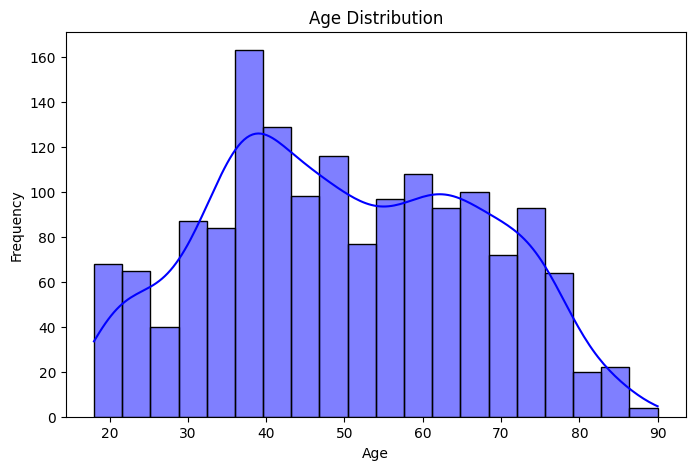

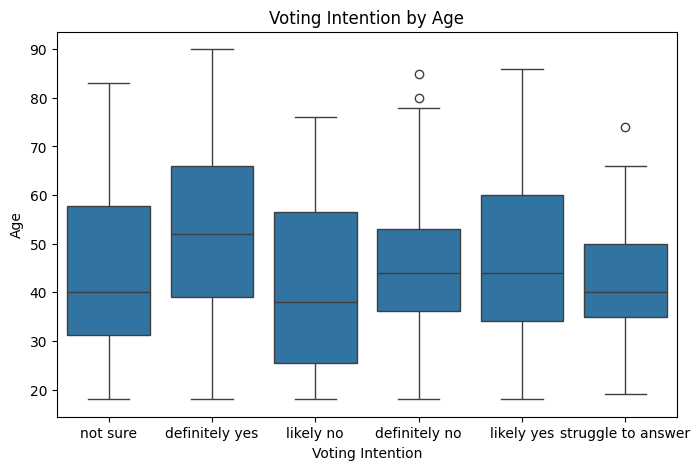

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(election_data['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Voting intention by age
plt.figure(figsize=(8, 5))
sns.boxplot(x='will_vote', y='age', data=election_data)
plt.title('Voting Intention by Age')
plt.xlabel('Voting Intention')
plt.ylabel('Age')
plt.show()


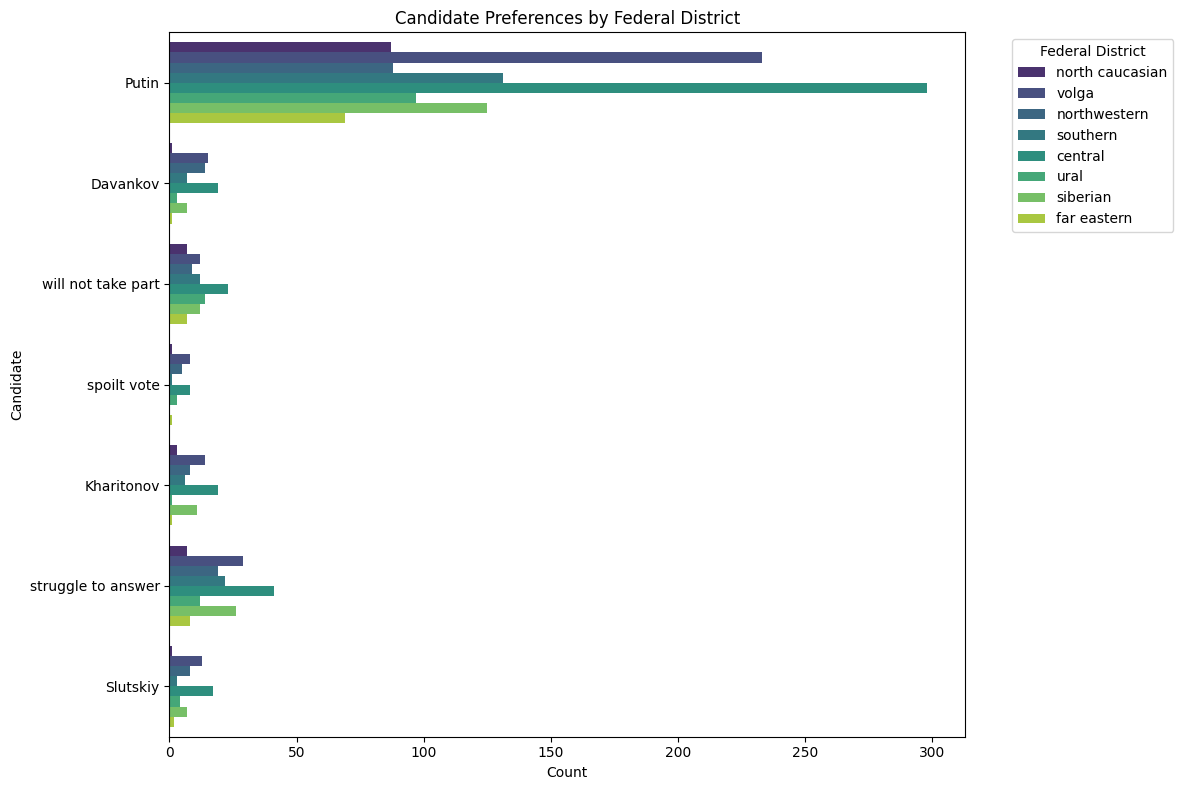

In [16]:
# Candidate preferences by federal district
plt.figure(figsize=(12, 8))
sns.countplot(data=election_data, y='candidate', hue='federal_district', palette='viridis')
plt.title('Candidate Preferences by Federal District')
plt.xlabel('Count')
plt.ylabel('Candidate')
plt.legend(title='Federal District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


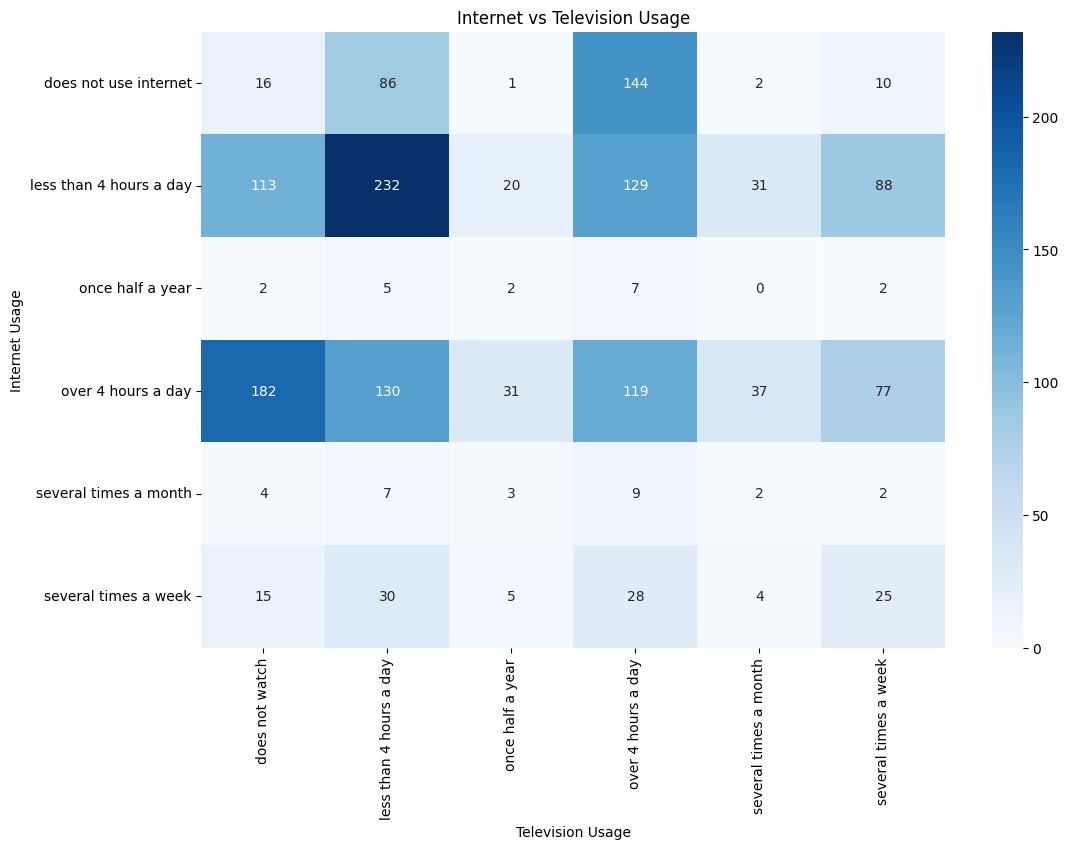

In [17]:
# Internet usage vs television usage
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(election_data['internet_usage'], election_data['television_usage']), annot=True, fmt='d', cmap='Blues')
plt.title('Internet vs Television Usage')
plt.xlabel('Television Usage')
plt.ylabel('Internet Usage')
plt.show()


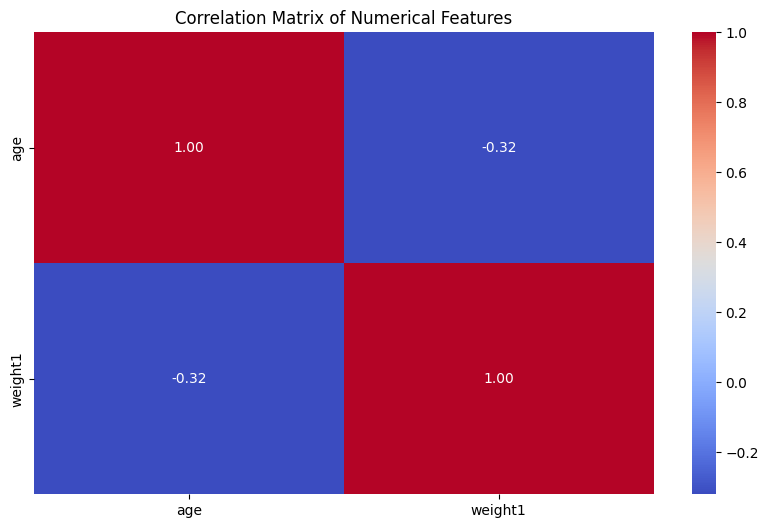

In [18]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(election_data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


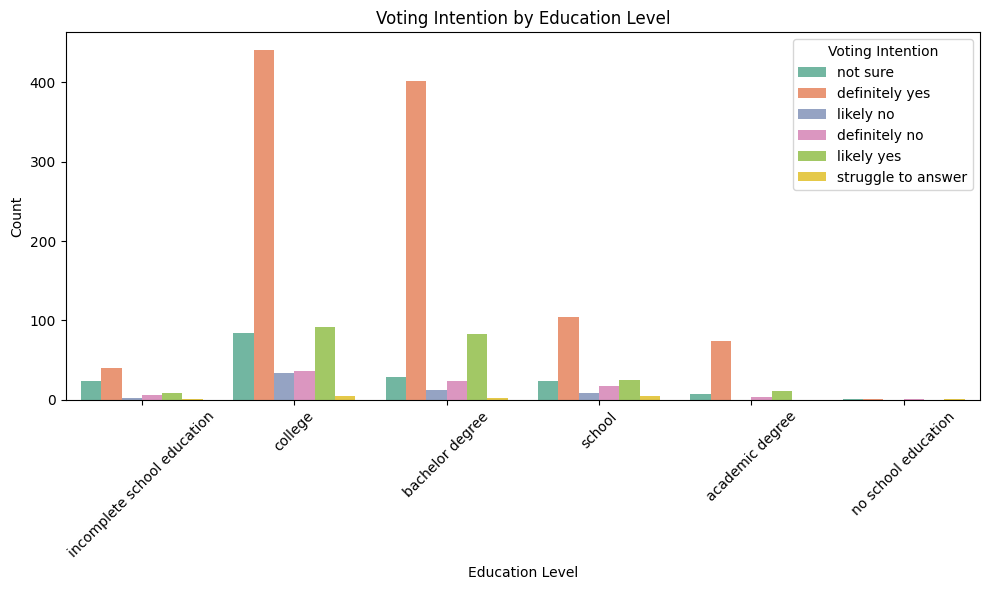

In [19]:
# Voting intention by education level
plt.figure(figsize=(10, 6))
sns.countplot(data=election_data, x='education', hue='will_vote', palette='Set2')
plt.title('Voting Intention by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Voting Intention')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
